In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_excel("Leetcode.xlsx")
time = df.pivot(index='LLM', columns='Question Name/ID', values='Time(ms):').dropna(axis=1)
time_relative = df.pivot(index='LLM', columns='Question Name/ID', values='Time how much faster than average:').dropna(axis=1)
space = df.pivot(index='LLM', columns='Question Name/ID', values='Memory(mb)').dropna(axis=1)
space_relative = df.pivot(index='LLM', columns='Question Name/ID', values='Memory how much more efficient than average').dropna(axis=1)

def g(pivot_df, title, yl):
    print('mean')
    print(pivot_df.mean(axis=1))
    print('var')
    print(pivot_df.var(axis=1))
    row_labels = pivot_df.index.tolist()
    
    num_categories = pivot_df.shape[1]
    
    bar_width = 0.4
    bar_padding = 0.1
    width = (bar_width + bar_padding)
    
    x = np.arange(num_categories)
    
    fig, ax = plt.subplots()
    ax.bar(x - width/2, pivot_df.loc['GPT4'], bar_width, label='GPT4', color='orange')
    ax.bar(x + width/2, pivot_df.loc['gemini'], bar_width, label='gemini', color='lightblue')
    
    ax.set_xlabel('Questions')
    ax.set_ylabel(yl)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.columns, rotation=45, ha='right', fontsize=5)
    ax.legend()
    plt.savefig(title, bbox_inches='tight')
    
    plt.show()

    t_stat, p_value = ttest_ind(pivot_df.loc['GPT4'], pivot_df.loc['gemini'])
    print(p_value)


mean
LLM
GPT4      266.131579
gemini    366.052632
dtype: float64
var
LLM
GPT4      163143.955192
gemini    570467.726885
dtype: float64


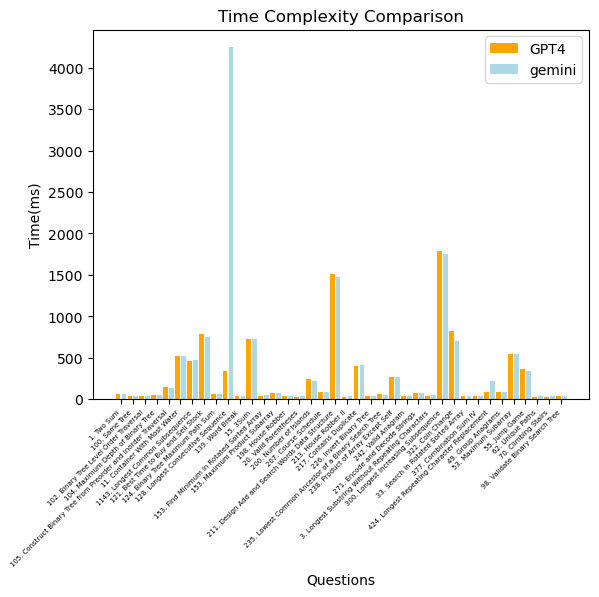

0.4743172997747793


In [7]:
g(time, 'Time Complexity Comparison', 'Time(ms)')

mean
LLM
GPT4      23.173421
gemini    23.138684
dtype: float64
var
LLM
GPT4      203.297212
gemini    204.328239
dtype: float64


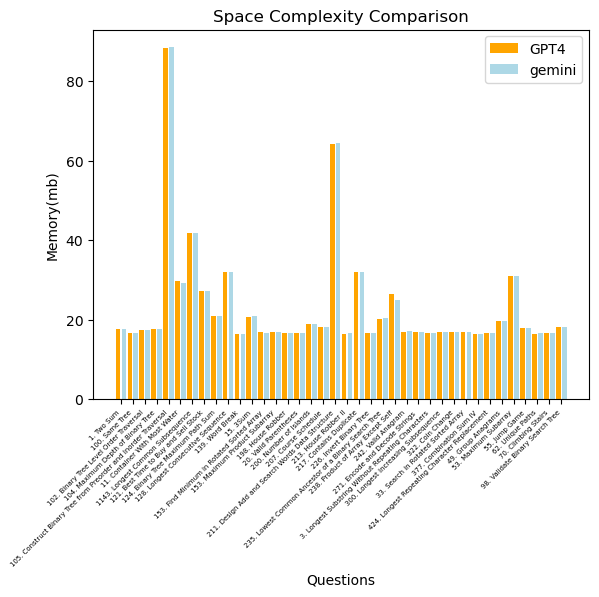

0.9915663392021412


In [8]:
g(space, 'Space Complexity Comparison', 'Memory(mb)')

mean
LLM
GPT4      0.594671
gemini    0.574487
dtype: float64
var
LLM
GPT4      0.05253
gemini    0.06483
dtype: float64


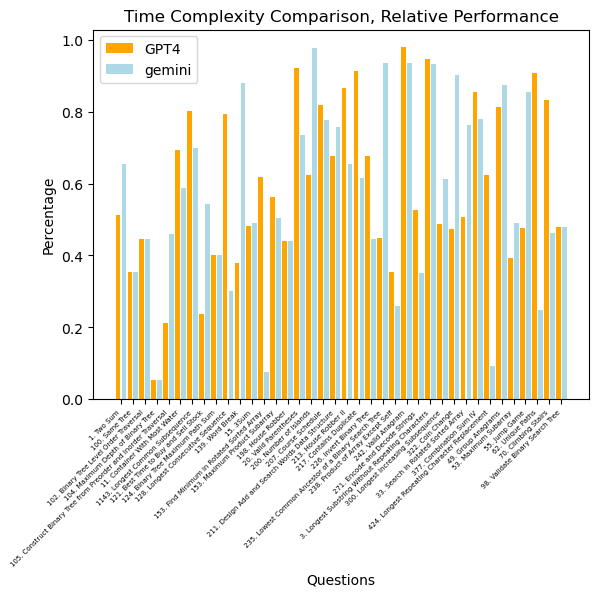

0.7174927008489027


In [9]:
g(time_relative, 'Time Complexity Comparison, Relative Performance', 'Percentage')

mean
LLM
GPT4      0.538718
gemini    0.558013
dtype: float64
var
LLM
GPT4      0.090445
gemini    0.073645
dtype: float64


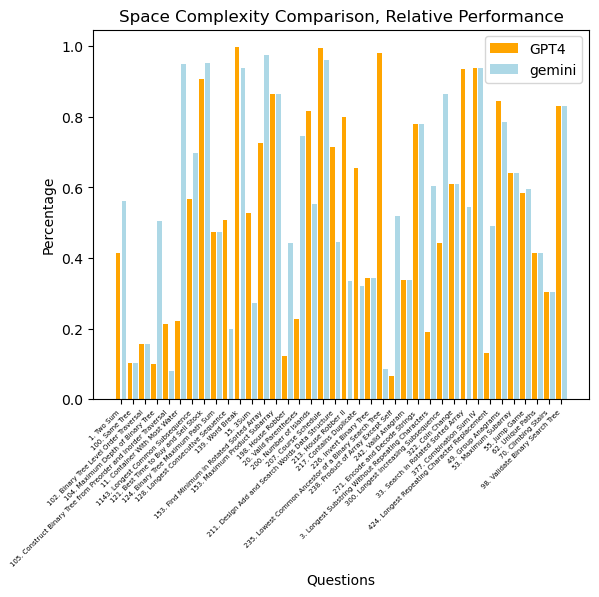

0.7698681380750196


In [10]:
g(space_relative, 'Space Complexity Comparison, Relative Performance', 'Percentage')